In [2]:
# import libraries for data manipulation

import pandas as pd

# Let's read VIIRS csv sample data set into a DataFrame df

df = pd.read_csv('https://firms.modaps.eosdis.nasa.gov/content/notebooks/sample_viirs_snpp_071223.csv')

# show how many rows (records) and columns (values per record) we have

print ('FIRMS sample fire data contains %i rows and %i columns' % (df.shape[0], df.shape[1]))
df.shape

FIRMS sample fire data contains 74605 rows and 14 columns


(74605, 14)

In [3]:
df

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,0.05836,29.59085,295.64,0.38,0.59,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.83,N
1,0.48765,31.50760,296.73,0.51,0.66,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.56,N
2,2.15227,13.94524,305.26,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,287.94,1.08,N
3,2.15681,13.94618,319.05,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,288.77,1.81,N
4,2.15754,13.94131,301.13,0.51,0.50,2023-07-12,3,N,VIIRS,n,2.0NRT,288.17,1.81,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74600,61.42408,-110.40578,350.48,0.40,0.40,2023-07-12,1950,N,VIIRS,n,2.0URT,309.39,16.01,D
74601,61.42510,-110.39867,336.03,0.40,0.40,2023-07-12,1950,N,VIIRS,l,2.0URT,308.08,32.98,D
74602,61.42733,-110.40780,328.53,0.40,0.40,2023-07-12,1950,N,VIIRS,n,2.0URT,298.15,16.01,D
74603,61.42834,-110.40069,338.45,0.40,0.40,2023-07-12,1950,N,VIIRS,n,2.0URT,302.81,32.98,D


In [4]:
df.describe

<bound method NDFrame.describe of        latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0       0.05836   29.59085      295.64  0.38   0.59  2023-07-12         3   
1       0.48765   31.50760      296.73  0.51   0.66  2023-07-12         3   
2       2.15227   13.94524      305.26  0.51   0.49  2023-07-12         3   
3       2.15681   13.94618      319.05  0.51   0.49  2023-07-12         3   
4       2.15754   13.94131      301.13  0.51   0.50  2023-07-12         3   
...         ...        ...         ...   ...    ...         ...       ...   
74600  61.42408 -110.40578      350.48  0.40   0.40  2023-07-12      1950   
74601  61.42510 -110.39867      336.03  0.40   0.40  2023-07-12      1950   
74602  61.42733 -110.40780      328.53  0.40   0.40  2023-07-12      1950   
74603  61.42834 -110.40069      338.45  0.40   0.40  2023-07-12      1950   
74604  61.42936 -110.39356      339.52  0.40   0.40  2023-07-12      1950   

      satellite instrument confidence ver

In [5]:
# we need to install some libraries as they are not default on the system
!pip install geodatasets cartopy
!pip install geopandas
import geopandas
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from geodatasets import get_path

  Using cached geodatasets-2026.1.0-py3-none-any.whl.metadata (5.5 kB)
  Using cached cartopy-0.25.0-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached pyshp-3.0.3-py3-none-any.whl.metadata (65 kB)
Using cached geodatasets-2026.1.0-py3-none-any.whl (22 kB)
Using cached cartopy-0.25.0-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached pyshp-3.0.3-py3-none-any.whl (58 kB)
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)

   ---------- ----------------------------- 1/4 [pooch]
   ---------- ----------------------------- 1/4 [pooch]
   -------------------- ------------------- 2/4 [geodatasets]
   ------------------------------ --------- 3/4 [cartopy]
   ------------------------------ --------- 3/4 [cartopy]
   ------------------------------ --------- 3/4 [cartopy]
   ------------------------------ --------- 3/4 [cartopy]
   ------------------------------ --------- 3/4 [cartopy]
   ------------------------------ --------- 3

<Axes: >

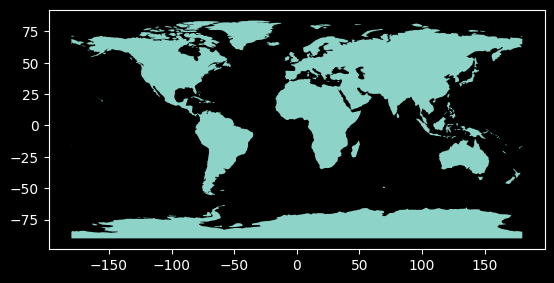

In [6]:
# let's get our basic earth data

path = get_path("naturalearth.land")
world = geopandas.read_file(path)

# and test our libraries loaded

world.plot()

In [7]:
# now convert latitude, longitude values into point geometry

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

# show top 3 records
gdf.head(3)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,geometry
0,0.05836,29.59085,295.64,0.38,0.59,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.83,N,POINT (29.59085 0.05836)
1,0.48765,31.50760,296.73,0.51,0.66,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.56,N,POINT (31.5076 0.48765)
2,2.15227,13.94524,305.26,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,287.94,1.08,N,POINT (13.94524 2.15227)


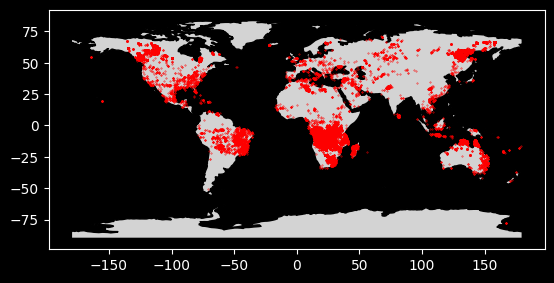

In [8]:
# optional: set outline and fill colors
ax = world.plot(color="lightgrey", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red", markersize=0.1)

plt.show()

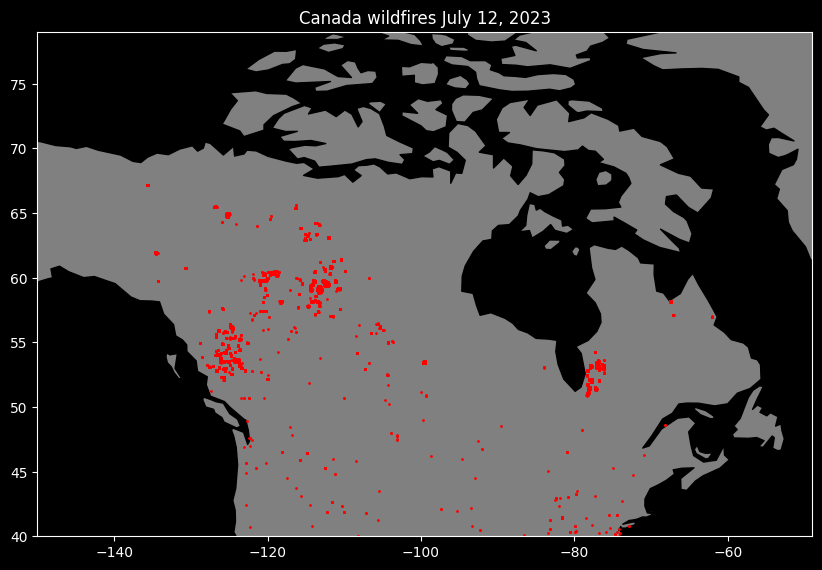

In [9]:
# create Canada subset

df_canada = df[(df['longitude'] >= -150) & (df['latitude'] >= 40) & (df['longitude'] <= -49) & (df['latitude'] <= 79)].copy()

# create geometry for points using latitude and longitude and specifying projection as EPSG:4326

gdf = geopandas.GeoDataFrame(
    df_canada, geometry=geopandas.points_from_xy(df_canada.longitude, df_canada.latitude), crs="EPSG:4326"
)

# set our extent
extent = [-150, 40, -49, 79]
ax = world.plot(figsize=(10, 10), color="grey", edgecolor="black")
ax.set_xlim([extent[0],  extent[2]])
ax.set_ylim([extent[1],  extent[3]])

ax.set(title='Canada wildfires July 12, 2023')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red", markersize=1)

plt.show()


In [10]:
!pip install geopandas
import geopandas

In [11]:
import os
import pandas as pd
import requests
from dotenv import load_dotenv

load_dotenv()
MAP_KEY = os.getenv('MAP_KEY') 

if not MAP_KEY:
    raise ValueError("MAP_KEY not found in .env file. Get one from https://firms.modaps.eosdis.nasa.gov/api/")


REGION_BBOX = {
    "india": {
        "up": "77.1,23.5,84.5,31.5",
        "mp": "74.0,21.0,82.0,26.0",
        "maharashtra": "72.5,17.0,80.0,22.0",
    },
}

def fetch_firms_data(country: str, state: str, source="VIIRS_SNPP_NRT", day_range=3):
    """
    Fetch FIRMS fire data for a country/state bounding box.
    
    Returns: pandas DataFrame with only necessary fields
    """
    country = country.lower()
    state = state.lower()

    if country not in REGION_BBOX or state not in REGION_BBOX[country]:
        raise ValueError(f"Bounding box not found for {country} / {state}")

    area = REGION_BBOX[country][state]
    base_url = "https://firms.modaps.eosdis.nasa.gov"  
    url = f"{base_url}/api/area/csv/{MAP_KEY}/{source}/{area}/{day_range}"

    print(f"Fetching FIRMS data from: {url}")

    response = requests.get(url)
    if response.status_code != 200:
        raise ConnectionError(f"Error fetching data: {response.status_code} - {response.text}")

    temp_file = "firms_temp.txt"
    with open(temp_file, "wb") as f:
        f.write(response.content)

    try:
        df = pd.read_csv(temp_file, sep=",")
    except:
        df = pd.read_csv(temp_file, sep="\t")

    necessary_cols = ["latitude", "longitude", "acq_date", "acq_time", "confidence"]
    df = df[necessary_cols]

    df = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
    )

    return df



In [12]:
df_up = fetch_firms_data("india", "up", day_range=3)
print(df_up.head())


Fetching FIRMS data from: https://firms.modaps.eosdis.nasa.gov/api/area/csv/d7715d0b397e253e24f3c98f9b689111/VIIRS_SNPP_NRT/77.1,23.5,84.5,31.5/3
   latitude  longitude    acq_date  acq_time confidence  \
0  25.84485   83.73350  2026-01-13       637          n   
1  26.75196   84.33796  2026-01-13       637          n   
2  28.39377   84.46178  2026-01-13       639          n   
3  28.72674   82.95060  2026-01-13       639          n   
4  28.73236   82.94481  2026-01-13       639          h   

                    geometry  
0   POINT (83.7335 25.84485)  
1  POINT (84.33796 26.75196)  
2  POINT (84.46178 28.39377)  
3   POINT (82.9506 28.72674)  
4  POINT (82.94481 28.73236)  


In [13]:

df_up

,latitude,longitude,acq_date,acq_time,confidence,geometry
0,25.84485,83.73350,2026-01-13,637,n,POINT (83.7335 25.84485)
1,26.75196,84.33796,2026-01-13,637,n,POINT (84.33796 26.75196)
2,28.39377,84.46178,2026-01-13,639,n,POINT (84.46178 28.39377)
3,28.72674,82.95060,2026-01-13,639,n,POINT (82.9506 28.72674)
4,28.73236,82.94481,2026-01-13,639,h,POINT (82.94481 28.73236)
...,...,...,...,...,...,...
601,24.20191,80.79881,2026-01-14,2027,n,POINT (80.79881 24.20191)
602,24.20482,82.71576,2026-01-14,2027,n,POINT (82.71576 24.20482)
603,24.20914,82.71208,2026-01-14,2027,n,POINT (82.71208 24.20914)
604,24.52863,81.16850,2026-01-14,2027,n,POINT (81.1685 24.52863)


In [ ]:
import folium

center_lat = df_up['latitude'].mean()
center_lon = df_up['longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=6, tiles="OpenStreetMap")

colors = {'h':'red', 'n':'orange', 'l':'yellow'}

for idx, row in df_up.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        color=colors[row['confidence']],
        fill=True,
        fill_opacity=0.7,
        popup=f"Date: {row['acq_date']}, Time: {row['acq_time']}"
    ).add_to(m)

m.save("firms_up_map.html")



In [22]:
m